# WWOX

WWOX encodes a 414-amino acid protein containing 2 WW domains coupled to a region with high homology to the short-chain dehydrogenase/reductase (SRD) family of enzymes.
[developmental and epileptic encephalopathy-28 (DEE28)](https://omim.org/entry/616211) and [ autosomal recessive spinocerebellar ataxia-12 (SCAR12)](https://omim.org/entry/614322) caused by biallelic mutation in the WWOX gene.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release="v2025-01-16")
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.6.dev0


### WWOX
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for WWOX.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'WWOX'
mane_tx_id = 'NM_016373.4'
mane_protein_id = "NP_057457.1" 
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.24'

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Individuals Processed: 100%|██████████| 38/38 [00:05<00:00,  7.26 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer
viewer = CohortViewer(hpo=hpo)
viewer.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
36,Global developmental delay
32,EEG abnormality
29,Epileptic encephalopathy
20,Hypokinesia
19,Thin corpus callosum
19,Reduced eye contact
15,Spasticity
14,Cerebral atrophy
12,Bilateral tonic-clonic seizure
12,Epileptic spasm


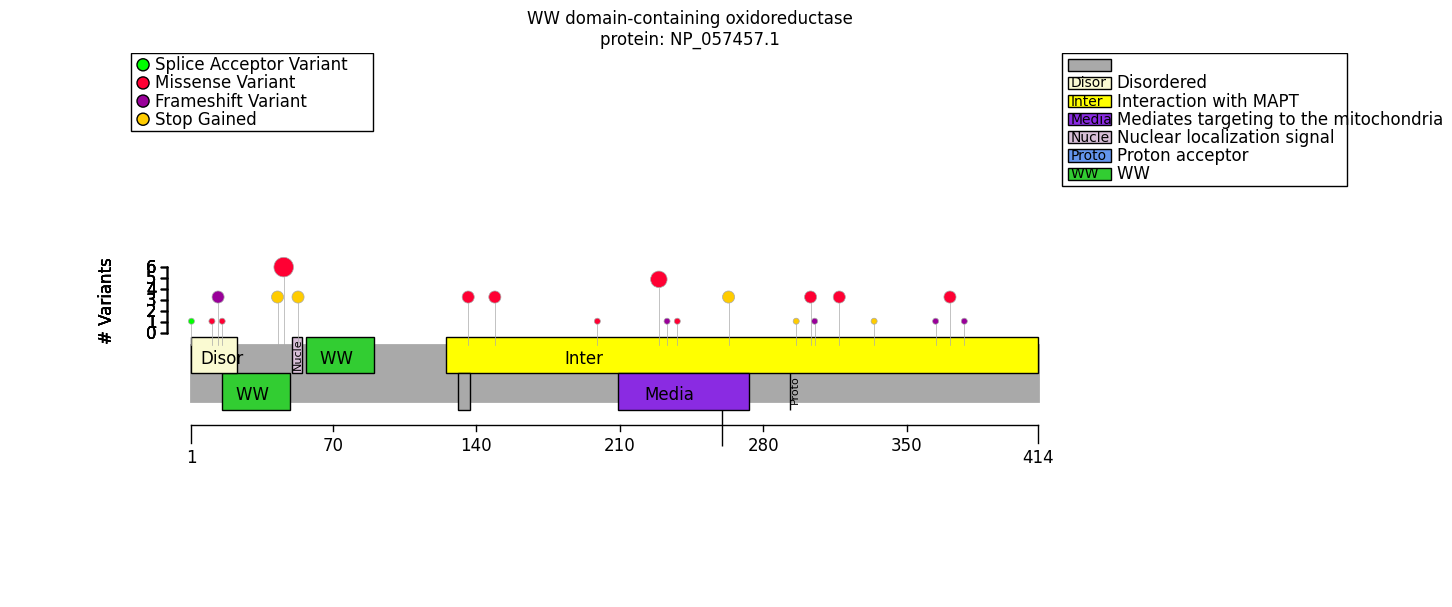

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

wwox_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
wwox_fig.tight_layout()

In [6]:
from gpsea.view import CohortVariantViewer
viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort=cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
4,16_78108454_78108454_C_A,c.139C>A (p.Pro47Thr),2,missense
4,16_78424953_78424953_A_C,c.689A>C (p.Gln230Pro),7,missense
3,16_78386858_78425054_--38197bp--_A,c.517_791del (p.His173IlefsTer5),"6, 7","splice acceptor, splice donor, splice donor 5th base, coding sequence, intronic"
3,SO:1000029_HGNC:12799_WWOX,SV involving WWOX (p.?),,chromosomal deletion
3,16_78386858_78432751_--45894bp--_A,c.517_1056del (p.His173_Met352del),"6, 7, 8","splice acceptor, splice donor, splice donor 5th base, coding sequence, intronic"
2,16_78108446_78108446_G_A,c.131G>A (p.Trp44Ter),2,stop gained
2,16_78164183_78164183_G_A,c.410G>A (p.Gly137Glu),5,"missense, splice region"
2,16_78164222_78164222_A_C,c.449A>C (p.His150Pro),5,missense
2,16_79211665_79211665_G_C,c.1114G>C (p.Gly372Arg),9,missense
2,16_78425054_78425054_C_T,c.790C>T (p.Arg264Ter),7,"stop gained, splice region"


In [7]:
from gpsea.view import ProteinVariantViewer

viewer = ProteinVariantViewer(protein_meta, mane_tx_id)
viewer.process(cohort)

Count,Name,Type,Coordinates,Variants
5,Disordered,Region,2 - 23,p.Met1_?137; p.Asp16SerfsTer63; p.Thr12Met; p.Glu17Lys
10,WW 1,Domain,17 - 49,p.Trp44Ter; p.Pro47Thr; p.Pro47Arg; p.Glu17Lys; p.Met1_?137
3,Nuclear localization signal,Motif,51 - 55,p.Arg54Ter; p.Met1_?137
1,WW 2,Domain,58 - 90,p.Met1_?137
25,Interaction with MAPT,Region,126 - 414,p.Ser304Phe; p.Gly372Arg; p.Lys297Ter; p.Ser304Tyr; p.Ser318Leu; p.Trp335Ter; p.Cys380LeufsTer149; p.Met1_?137; p.Val365AlafsTer163; p.Arg264Ter; p.Gly137Glu; p.Lys200Glu; p.His236AlafsTer34; p.His150Pro; p.Gln230Pro; p.Leu239Arg; p.Glu306AspfsTer21
3,,Binding site,132 - 137,p.Gly137Glu; p.Met1_?137
8,Mediates targeting to the mitochondria,Region,210 - 273,p.His236AlafsTer34; p.Arg264Ter; p.Gln230Pro; p.Leu239Arg
0,,Binding site,261 - 260,
0,Proton acceptor,Active site,294 - 293,


# Genotype-Phenotype Correlation (GPC) Analysis

Several GPC ideas were developed mainly through accurate reading of "The phenotypic spectrum of WWOX-related disorders: 20
additional cases of WOREE syndrome and review of the literature" by orcid:0000-0002-6912-8518.

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)

pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.view import MtcStatsViewer
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect
from gpsea.analysis.clf import biallelic_classifier

is_missense = variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)

missense_clf = biallelic_classifier(
    a_predicate=is_missense,
    b_predicate=~is_missense,
    a_label="Missense",
    b_label="Other",
    partitions=((0,1), (2,))
)
missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(missense_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,7
"Skipping ""general"" level terms",53
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),136


In [10]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,Missense/Missense OR Missense/Other,Other/Other,Corrected p values,p values
Abnormal electroretinogram [HP:0000512],0/8 (0%),6/8 (75%),0.307692,0.006993
Generalized non-motor (absence) seizure [HP:0002121],2/12 (17%),0/14 (0%),1.000000,0.203077
Narrow forehead [HP:0000341],0/10 (0%),3/10 (30%),1.000000,0.210526
Short neck [HP:0000470],0/10 (0%),3/11 (27%),1.000000,0.214286
Cerebral atrophy [HP:0002059],4/12 (33%),10/16 (62%),1.000000,0.251860
Spasticity [HP:0001257],8/13 (62%),8/9 (89%),1.000000,0.333038
Reduced eye contact [HP:0000817],7/11 (64%),12/14 (86%),1.000000,0.350000
Focal clonic seizure [HP:0002266],4/12 (33%),2/14 (14%),1.000000,0.365217
Bilateral tonic-clonic seizure with focal onset [HP:0007334],2/12 (17%),5/15 (33%),1.000000,0.408213
Micrognathia [HP:0000347],0/10 (0%),2/10 (20%),1.000000,0.473684


In [11]:
from gpsea.analysis.predicate import protein_feature

interaction_mapt = protein_feature("Interaction with MAPT", protein_metadata=protein_meta)

mapt_clf = biallelic_classifier(
    a_predicate=interaction_mapt,
    b_predicate=~interaction_mapt,
    a_label="MAPT Interaction",
    b_label="Other",
    partitions=((0,1), (2,)) # seems to show one correlation, could be biased by having tried hard to find something
)
mapt_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=mapt_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=mapt_result)

Allele group,MAPT Interaction/MAPT Interaction OR MAPT Interaction/Other,Other/Other,Corrected p values,p values
Bilateral tonic-clonic seizure with focal onset [HP:0007334],0/18 (0%),7/9 (78%),0.001784,0.000041
Hypokinesia [HP:0002375],16/17 (94%),4/8 (50%),0.347368,0.023452
Micrognathia [HP:0000347],0/16 (0%),2/4 (50%),0.347368,0.031579
Anteverted nares [HP:0000463],0/16 (0%),2/4 (50%),0.347368,0.031579
Epileptic spasm [HP:0011097],10/19 (53%),2/10 (20%),0.937343,0.126077
Short neck [HP:0000470],1/16 (6%),2/5 (40%),0.937343,0.127820
Frontal bossing [HP:0002007],0/16 (0%),1/4 (25%),1.000000,0.200000
Decreased fetal movement [HP:0001558],2/16 (12%),2/5 (40%),1.000000,0.228070
Spasticity [HP:0001257],13/16 (81%),3/6 (50%),1.000000,0.282860
Reduced eye contact [HP:0000817],14/17 (82%),5/8 (62%),1.000000,0.344190


In [12]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Round face [HP:0000311],4/12 (33%),0/8 (0%),1.0,0.116615
Focal clonic seizure [HP:0002266],2/17 (12%),4/9 (44%),1.0,0.137853
Decreased fetal movement [HP:0001558],1/12 (8%),3/9 (33%),1.0,0.272180
Cerebral atrophy [HP:0002059],11/19 (58%),3/9 (33%),1.0,0.419710
Micrognathia [HP:0000347],2/12 (17%),0/8 (0%),1.0,0.494737
Focal tonic seizure [HP:0011167],3/17 (18%),0/9 (0%),1.0,0.529231
Delayed CNS myelination [HP:0002188],2/17 (12%),0/9 (0%),1.0,0.529231
Generalized non-motor (absence) seizure [HP:0002121],2/17 (12%),0/9 (0%),1.0,0.529231
Upslanted palpebral fissure [HP:0000582],1/12 (8%),2/9 (22%),1.0,0.553383
Axial hypotonia [HP:0008936],7/9 (78%),4/7 (57%),1.0,0.596154


In [13]:
"""
Idea coming from 'The phenotypic spectrum of WWOX-related disorders: 20
additional cases of WOREE syndrome and review of the literature' --> No success

'According to the tentative classification, patients carrying
two predicted null alleles were more likely to present with the
most severe WOREE phenotype whereas hypomorphic
genotypes with two missense variants would instead result
in spinocerebellar ataxia (SCAR12). The phenotype of
patients carrying a null allele and a missense pathogenic
variation would be intermediate'

Let's try (Null|Null vs Null|Missense OR Missense|Missense)
"""
from gpsea.analysis.predicate import anyof

null_effects = ( 
   VariantEffect.STOP_GAINED,
   VariantEffect.SPLICE_ACCEPTOR_VARIANT,
   VariantEffect.SPLICE_DONOR_REGION_VARIANT,
   VariantEffect.FRAMESHIFT_VARIANT,
)
is_null = anyof(variant_effect(e, tx_id=mane_tx_id) for e in null_effects
)
is_missense = variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)

null_predicate = biallelic_classifier(
    a_predicate=is_null,
    b_predicate=~is_null,
    a_label="null",
    b_label="missense",
    partitions=((0,), (1,2,))
    #partitions=((0,1), (2,)) # no luck either
)
null_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=null_predicate,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo=hpo, result=null_result)

Allele group,null/null,null/missense OR missense/missense,Corrected p values,p values
Abnormal electroretinogram [HP:0000512],4/5 (80%),2/11 (18%),0.785714,0.035714
Axial hypotonia [HP:0008936],2/6 (33%),9/10 (90%),0.785714,0.035714
Cerebral atrophy [HP:0002059],9/12 (75%),5/16 (31%),0.795489,0.054238
Narrow forehead [HP:0000341],3/9 (33%),0/11 (0%),0.810526,0.073684
Spasticity [HP:0001257],6/6 (100%),10/16 (62%),1.000000,0.132752
Focal tonic seizure [HP:0011167],0/10 (0%),3/16 (19%),1.000000,0.261538
Uplifted earlobe [HP:0009909],3/9 (33%),1/11 (9%),1.000000,0.284830
Optic atrophy [HP:0000648],3/9 (33%),2/14 (14%),1.000000,0.342833
Reduced eye contact [HP:0000817],9/10 (90%),10/15 (67%),1.000000,0.344862
Focal clonic seizure [HP:0002266],1/10 (10%),5/16 (31%),1.000000,0.352387


# Summary

In [14]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
  GPAnalysisResultSummary.from_multi( result=missense_result  ),
  GPAnalysisResultSummary.from_multi( result=mapt_result  ),
  GPAnalysisResultSummary.from_multi( result=mf_result  ),
)


caption = """Phenotype/genotype correlations were recently suggested for WWOX-related neurodevelopmental disorders5,7 
with a classification of WWOX genotypes into three groups. According to the tentative classification, patients carrying 
two predicted null alleles were more likely to present with the most severe WOREE phenotype whereas hypomorphic genotypes 
with two missense variants would instead result in spinocerebellar ataxia (SCAR12) \\cite{PMID_30356099,PMID_25716914,PMID_25411445}."""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [15]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [16]:
summarizer.process_latex(report=report, protein_fig=wwox_fig)

Figure saved to ../../supplement/img/WWOX_protein_diagram-draft.pdf
Output to ../../supplement/tex/WWOX_summary_draft.tex
